<a href="https://colab.research.google.com/github/DommiiUdomp/Prediction/blob/main/ForecastingAutomating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import plotly.express as px

# New Section

# New Section

In [4]:
#!pip install fbprophet
#from fbprophet import fbprophet

In [5]:
from prophet import Prophet

In [6]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [7]:
df = pd.read_csv('/content/AMZN.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-15,142.800003,143.759995,141.490005,143.179993,143.179993,39014600
1,2022-08-16,143.910004,146.570007,142.000000,144.779999,144.779999,59102900
2,2022-08-17,142.690002,143.380005,140.779999,142.100006,142.100006,48149800
3,2022-08-18,141.320007,142.770004,140.380005,142.300003,142.300003,37458700
4,2022-08-19,140.470001,141.110001,137.910004,138.229996,138.229996,47792800


In [9]:
px.area(df, x='Date', y='Close')

In [10]:
px.line(df, x='Date', y='Close')

In [11]:
px.area(df, x='Date', y='Volume')

In [12]:
px.bar(df, y='Volume')

In [13]:
px.box(df, y='Close')

In [14]:
columns = ['Date','Close']
ndf = pd.DataFrame(df, columns = columns)

In [15]:
ndf

,Date,Close
0,2022-08-15,143.179993
1,2022-08-16,144.779999
2,2022-08-17,142.100006
3,2022-08-18,142.300003
4,2022-08-19,138.229996
...,...,...
245,2023-08-07,142.220001
246,2023-08-08,139.940002
247,2023-08-09,137.850006
248,2023-08-10,138.559998


In [16]:
prophet_df=ndf.rename(columns = {'Date':'ds','Close':'y'})

In [17]:
prophet_df

,ds,y
0,2022-08-15,143.179993
1,2022-08-16,144.779999
2,2022-08-17,142.100006
3,2022-08-18,142.300003
4,2022-08-19,138.229996
...,...,...
245,2023-08-07,142.220001
246,2023-08-08,139.940002
247,2023-08-09,137.850006
248,2023-08-10,138.559998


In [18]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahvpabky/mvcqhxb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpahvpabky/_gdvari6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37981', 'data', 'file=/tmp/tmpahvpabky/mvcqhxb7.json', 'init=/tmp/tmpahvpabky/_gdvari6.json', 'output', 'file=/tmp/tmpahvpabky/prophet_model9ry67su5/prophet_model-20230814141249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=30)

In [20]:
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-15,139.687507,133.261074,144.711899,139.687507,139.687507,-0.540469,-0.540469,-0.540469,-0.540469,-0.540469,-0.540469,0.0,0.0,0.0,139.147038
1,2022-08-16,139.227384,132.134394,144.283079,139.227384,139.227384,-0.776669,-0.776669,-0.776669,-0.776669,-0.776669,-0.776669,0.0,0.0,0.0,138.450715
2,2022-08-17,138.767260,132.368881,143.897737,138.767260,138.767260,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,0.0,0.0,0.0,137.939995
3,2022-08-18,138.307136,132.354628,143.586301,138.307136,138.307136,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,0.0,0.0,0.0,137.884621
4,2022-08-19,137.847013,131.497555,143.492719,137.847013,137.847013,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,0.0,0.0,0.0,137.258757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-09-06,147.290209,140.378363,152.333940,146.443614,148.322940,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,0.0,0.0,0.0,146.462944
276,2023-09-07,147.583622,140.953685,153.098274,146.657556,148.680669,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,0.0,0.0,0.0,147.161107
277,2023-09-08,147.877036,141.112039,152.963909,146.896031,149.046697,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,0.0,0.0,0.0,147.288780
278,2023-09-09,148.170449,143.935527,156.197331,147.123272,149.403551,1.577587,1.577587,1.577587,1.577587,1.577587,1.577587,0.0,0.0,0.0,149.748036


In [22]:
px.line(forecast, x = 'ds',y='yhat')

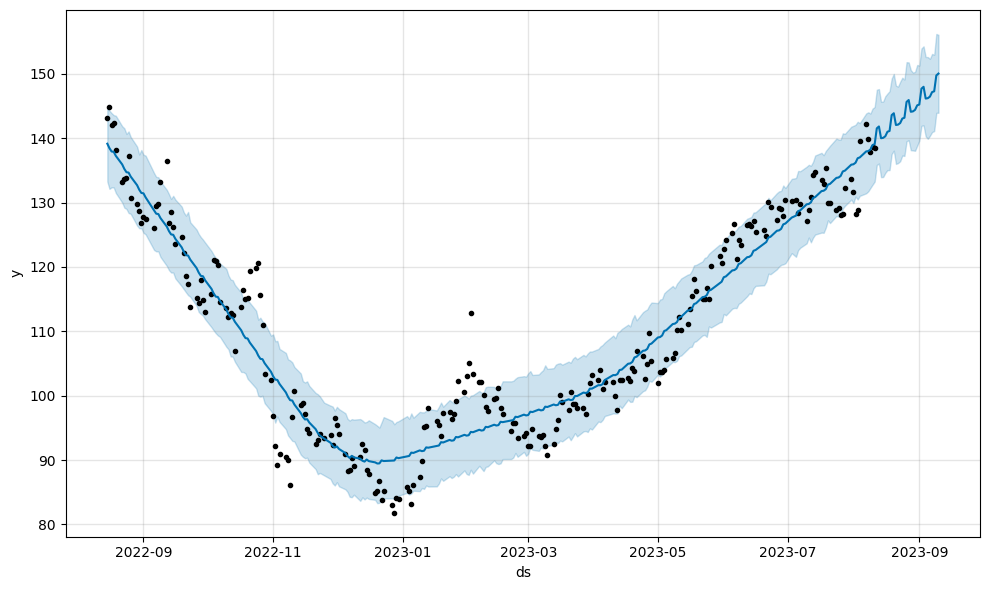

In [23]:
figure=m.plot(forecast, xlabel='ds',ylabel='y')

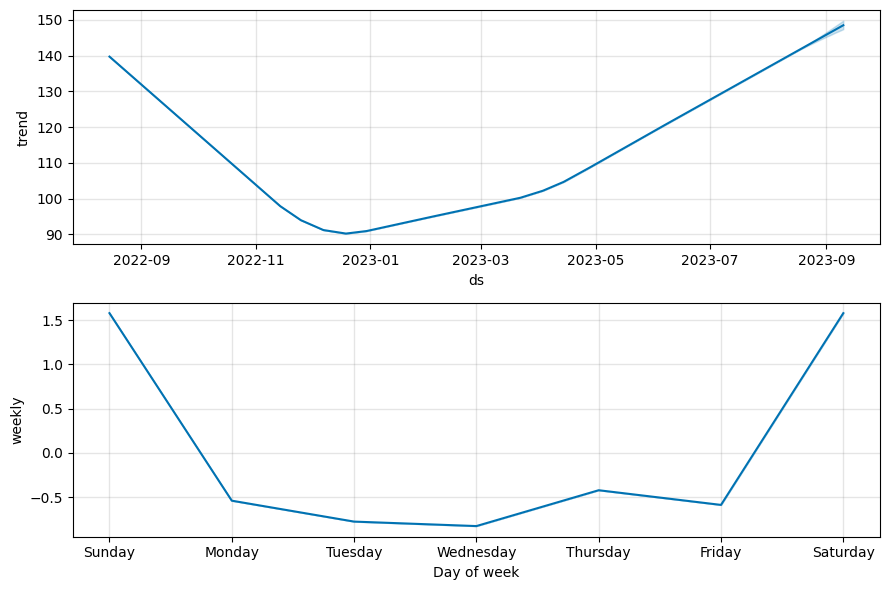

In [24]:
figure=m.plot_components(forecast)

In [25]:
from google.colab import files
forecast.to_csv ('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df_forecast = pd.read_csv('/content/forecast.csv')
df_forecast

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2022-08-15,139.687507,133.261074,144.711899,139.687507,139.687507,-0.540469,-0.540469,-0.540469,-0.540469,-0.540469,-0.540469,0.0,0.0,0.0,139.147038
1,1,2022-08-16,139.227384,132.134394,144.283079,139.227384,139.227384,-0.776669,-0.776669,-0.776669,-0.776669,-0.776669,-0.776669,0.0,0.0,0.0,138.450715
2,2,2022-08-17,138.767260,132.368881,143.897737,138.767260,138.767260,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,0.0,0.0,0.0,137.939995
3,3,2022-08-18,138.307136,132.354628,143.586301,138.307136,138.307136,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,0.0,0.0,0.0,137.884621
4,4,2022-08-19,137.847013,131.497555,143.492719,137.847013,137.847013,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,0.0,0.0,0.0,137.258757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,2023-09-06,147.290209,140.378363,152.333940,146.443614,148.322940,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,-0.827265,0.0,0.0,0.0,146.462944
276,276,2023-09-07,147.583622,140.953685,153.098274,146.657556,148.680669,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,-0.422516,0.0,0.0,0.0,147.161107
277,277,2023-09-08,147.877036,141.112039,152.963909,146.896031,149.046697,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,-0.588256,0.0,0.0,0.0,147.288780
278,278,2023-09-09,148.170449,143.935527,156.197331,147.123272,149.403551,1.577587,1.577587,1.577587,1.577587,1.577587,1.577587,0.0,0.0,0.0,149.748036
